In [1]:
import os, glob, time, math, shutil
import numpy as np
import pandas as pd
import pandas.io.common
import matplotlib.pyplot as plt
%matplotlib inline
import astropy
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from scipy.optimize import curve_fit
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor
def LINEAR(X, B):
    return B*X
def IMG_LOG(IMAGE):
    a = 1000
    return np.log(IMAGE*a+1)/np.log(a)

In [ ]:

if BAND == 'r':
    if CC == 1:
        SIST_NormF = 5.079505778912232
    elif CC == 2:
        SIST_NormF = 5.140171408876091
    elif CC == 3:
        SIST_NormF = 5.1310723025130525
    elif CC == 4:
        SIST_NormF = 5.236631702748523
    elif CC == 5:
        SIST_NormF = 4.957325790847507
    elif CC == 6:
        SIST_NormF = 5.210639505070301

elif BAND == 'g':
    if CC == 1:
        SIST_NormF = 3.3352685988765955
    elif CC == 2:
        SIST_NormF = 3.8186011621684126
    elif CC == 3:
        SIST_NormF = 3.745866840446125
    elif CC == 4:
        SIST_NormF = 3.694717372301556
    elif CC == 5:
        SIST_NormF = 4.006293466645047
    elif CC == 6:
        SIST_NormF = 3.831022324602731

elif BAND == 'i':
    if CC == 1:
        SIST_NormF = 7.162752103626512
    elif CC == 2:
        SIST_NormF = 7.263528082123479
    elif CC == 3:
        SIST_NormF = 6.678249889369915
    elif CC == 4:
        SIST_NormF = 6.51081223805739
    elif CC == 5:
        SIST_NormF = 6.956327915830884
    elif CC == 6:
        SIST_NormF = 6.950627077059037


In [8]:
stacked_no = 34
BAND = 'g'

REF_PATH = 'D:\\research\\cGAN\\stack%d\\raw\\'%stacked_no

LIST_STA_g = sorted(glob.glob(REF_PATH + 'stacked\\g\\*.fit'))
LIST_STA_r = sorted(glob.glob(REF_PATH + 'stacked\\r\\*.fit'))
LIST_STA_i = sorted(glob.glob(REF_PATH + 'stacked\\i\\*.fit'))

LIST_SIN_g = sorted(glob.glob(REF_PATH + 'single\\g\\*.fit'))
LIST_SIN_r = sorted(glob.glob(REF_PATH + 'single\\r\\*.fit'))
LIST_SIN_i = sorted(glob.glob(REF_PATH + 'single\\i\\*.fit'))


mini = -1000
maxi = 400000

#Fg, Fr, Fi = 5.9, 4.9, 4.5
Fg, Fr, Fi = 4.957, 4.957, 4.957

In [10]:
LIST_STA_g[0][-27:]

'STA-200006-g1-0543-0101.fit'

In [11]:

qpix = 0
ISIZE = 260
pix = ISIZE-(qpix*2)

ID_STA_g, ID_STA_r, ID_STA_i = [], [], []
ID_SIN_g, ID_SIN_r, ID_SIN_i = [], [], []
for i in range(len(LIST_STA_r)):
    ID_STA_g.append(LIST_STA_g[i][-27:])
    ID_STA_r.append(LIST_STA_r[i][-27:])
    ID_STA_i.append(LIST_STA_i[i][-27:])
    
    ID_SIN_g.append(LIST_SIN_g[i][-27:])
    ID_SIN_r.append(LIST_SIN_r[i][-27:])
    ID_SIN_i.append(LIST_SIN_i[i][-27:])

    
IMG_STA_g = np.zeros(len(LIST_STA_g)*pix*pix).reshape(len(LIST_STA_g),pix,pix)
IMG_STA_r = np.zeros(len(LIST_STA_r)*pix*pix).reshape(len(LIST_STA_r),pix,pix)
IMG_STA_i = np.zeros(len(LIST_STA_i)*pix*pix).reshape(len(LIST_STA_i),pix,pix)

IMG_SIN_g = np.zeros(len(LIST_SIN_g)*pix*pix).reshape(len(LIST_SIN_g),pix,pix)
IMG_SIN_r = np.zeros(len(LIST_SIN_r)*pix*pix).reshape(len(LIST_SIN_r),pix,pix)
IMG_SIN_i = np.zeros(len(LIST_SIN_i)*pix*pix).reshape(len(LIST_SIN_i),pix,pix)
for i in range(len(LIST_STA_r)):
    IMG_STA_g[i] = fits.open(LIST_STA_g[i])[0].data[qpix:ISIZE-qpix, qpix:ISIZE-qpix]
    IMG_STA_r[i] = fits.open(LIST_STA_r[i])[0].data[qpix:ISIZE-qpix, qpix:ISIZE-qpix]
    IMG_STA_i[i] = fits.open(LIST_STA_i[i])[0].data[qpix:ISIZE-qpix, qpix:ISIZE-qpix]
    
    IMG_SIN_g[i] = fits.open(LIST_SIN_g[i])[0].data[qpix:ISIZE-qpix, qpix:ISIZE-qpix]
    IMG_SIN_r[i] = fits.open(LIST_SIN_r[i])[0].data[qpix:ISIZE-qpix, qpix:ISIZE-qpix]
    IMG_SIN_i[i] = fits.open(LIST_SIN_i[i])[0].data[qpix:ISIZE-qpix, qpix:ISIZE-qpix]
    
#fits.open(LIST_SIN_g[0])[0].data

KeyboardInterrupt: 

In [4]:
LIST_STA_g[0][-27:]

IndexError: list index out of range

In [4]:
if stacked_no == 22:
    delF = ['1-0150', '1-0151', '1-0152', '1-0159', '1-0171', '1-0175', '1-0181', '1-0186', '1-0193', '1-0201', '1-0253', '1-0254'
            , '1-0300', '1-0798'
            , '2-0129', '2-0151', '2-0152', '2-0170', '2-0171', '2-0179', '2-0180', '2-0198', '2-0253', '2-0274', '2-0277', '2-0278'
            , '2-0279', '2-0280', '2-0285', '2-0286', '2-0287', '2-0288', '2-0290', '2-0291', '2-0292', '2-0293', '2-0294', '2-0302'
            , '2-0798'
            , '3-0150', '3-0151', '3-0152', '3-0155', '3-0179', '3-0180', '3-0181', '3-0182', '3-0190', '3-0199', '3-0200', '3-0204'
            , '3-0215', '3-0230', '3-0233', '3-0234', '3-0267', '3-0274', '3-0276', '3-0277', '3-0285', '3-0286', '3-0293', '3-0798'
            , '4-0118', '4-0124', '4-0125', '4-0141', '4-0162', '4-0163', '4-0166', '4-0167', '4-0168', '4-0171', '4-0174', '4-0175'
            , '4-0176', '4-0177', '4-0178', '4-0179', '4-0180', '4-0181', '4-0182', '4-0183', '4-0191', '4-0197', '4-0198', '4-0199'
            , '4-0204', '4-0238', '4-0271', '4-0799'
            , '5-0144', '5-0162', '5-0163', '5-0164', '5-0183', '5-0197', '5-0198', '5-0232', '5-0271', '5-0292', '5-0797']
    print(len(delF))    
    print(330-len(delF))
if stacked_no == 28:
    delF = ['1-0313', '1-0315', '1-0316', '1-0317', '1-0330', '1-0361', '1-0364', '1-0365', '1-0387', '1-0388', '1-0392'
            , '1-0397', '1-0400', '1-0401', '1-0406', '1-0453', '1-0458', '1-0460', '1-0461', '1-0462', '1-0471', '1-0499'
            , '1-502', '1-0724', '1-0734', '1-0735', '1-0782', '1-0786'
            , '2-0316', '2-0317', '2-0364', '2-0383', '2-0384', '2-0434', '2-0451', '2-0452', '2-0453', '2-0470', '2-0472', '2-0758'
            , '2-0759'
            , '3-0323', '3-0383', '3-0401', '3-0447', '3-0460', '3-0461', '3-0462', '3-0469', '3-0711', '3-0767', '3-0783', '3-0784'
            , '4-0317', '4-0383', '4-0446', '4-0454', '4-0457', '4-0458', '4-0459', '4-0462', '4-0469', '4-0472', '4-0473', '4-0487'
            , '4-0497', '4-0522', '4-0736', '4-0737'
            , '5-0316', '5-0317', '5-0350', '5-0351', '5-0353', '5-0380', '5-0383', '5-0384', '5-0425', '5-0435', '5-0469', '5-0470'
            , '5-0471', '5-0477', '5-0487']
    print(len(delF))    
    print(310-len(delF))
elif stacked_no == 34:
    delF = ['1-0573', '1-0606', '2-0579', '2-0592', '2-0606', '2-0609', '2-0612', '2-0614', '2-0682', '3-0548', '3-0569'
            , '3-0604', '4-0550', '4-0589', '4-0592'
            , '4-0595', '4-0612', '4-0666', '4-0674', '4-0697', '5-0589', '5-0586', '5-0604', '5-0612', '5-0656', '5-0683', '5-0697'
            , '6-0612', '6-0617']
    print(len(delF))    
    print(204-len(delF))


29
175


In [6]:
dellist_1 = []
for i in range(len(IMG_STA_r)):
    if IMG_STA_g[i].min() < -100 or IMG_STA_r[i].min() < -100 or IMG_STA_i[i].min() < -100 or IMG_STA_g[i].max() > 400000 or IMG_STA_i[i].max() > 400000:
        dellist_1.append(i)
    if IMG_SIN_g[i].min()*4.957 < -1000 or IMG_SIN_i[i].min()*4.957 < -1000 or IMG_SIN_g[i].max()*4.957 > 400000 or IMG_SIN_i[i].max()*4.957 > 400000:
        dellist_1.append(i)
    for j in range(len(delF)):
        if LIST_STA_r[i][-15:-9] == delF[j]:
            dellist_1.append(i)
dellist_1 = sorted(list(set(dellist_1)))
print(len(dellist_1))

2465


In [8]:
tmp_cnt = 0
for i in range(len(IMG_STA_r)):
    if IMG_STA_g[i].max() > 400000:
        tmp_cnt += 1
        print(ID_STA_g[i])
print(tmp_cnt)

STA-200006-g2-0576-0806.fit
STA-200006-g2-0576-0807.fit
STA-200006-g2-0576-0906.fit
STA-200006-g2-0576-0907.fit
STA-200006-g2-0645-0701.fit
STA-200006-g2-0645-0801.fit
STA-200006-g2-0645-1107.fit
STA-200006-g2-0645-1108.fit
STA-200006-g2-0660-0908.fit
STA-200006-g2-0660-1008.fit
STA-200006-g4-0576-0804.fit
STA-200006-g4-0576-0805.fit
STA-200006-g4-0576-0904.fit
STA-200006-g4-0576-0905.fit
STA-200006-g4-0687-1201.fit
STA-200006-g4-0687-1202.fit
STA-200006-g4-0687-1203.fit
STA-200006-g6-0575-0305.fit
STA-200006-g6-0575-0306.fit
STA-200006-g6-0575-0405.fit
STA-200006-g6-0575-0406.fit
STA-200006-g6-0608-0307.fit
STA-200006-g6-0608-0308.fit
STA-200006-g6-0608-0407.fit
STA-200006-g6-0608-0408.fit
STA-200006-g6-0609-1001.fit
STA-200006-g6-0609-1002.fit
STA-200006-g6-0609-1101.fit
STA-200006-g6-0609-1102.fit
29


In [6]:
len(dellist_1)

2346

In [9]:
ID_STA_g = np.delete(ID_STA_g, dellist_1, axis=0)
ID_STA_r = np.delete(ID_STA_r, dellist_1, axis=0)
ID_STA_i = np.delete(ID_STA_i, dellist_1, axis=0)

ID_SIN_g = np.delete(ID_SIN_g, dellist_1, axis=0)
ID_SIN_r = np.delete(ID_SIN_r, dellist_1, axis=0)
ID_SIN_i = np.delete(ID_SIN_i, dellist_1, axis=0)

IMG_STA_g = np.delete(IMG_STA_g, dellist_1, axis=0)
IMG_STA_r = np.delete(IMG_STA_r, dellist_1, axis=0)
IMG_STA_i = np.delete(IMG_STA_i, dellist_1, axis=0)

IMG_SIN_g = np.delete(IMG_SIN_g, dellist_1, axis=0)
IMG_SIN_r = np.delete(IMG_SIN_r, dellist_1, axis=0)
IMG_SIN_i = np.delete(IMG_SIN_i, dellist_1, axis=0)


In [7]:
T0 = T1 = time.time()

thresh = 300

series_STA = pd.Series(IMG_STA.reshape(len(IMG_STA)*pix*pix))
IMG_STA_thresh = series_STA[series_STA > thresh].values
print('%0.2f'%(time.time()-T1), '%0.2f'%(time.time()-T0))
T1 = time.time()

series_SIN_g = pd.Series(IMG_SIN_g.reshape(len(IMG_SIN_g)*pix*pix))
IMG_SIN_g_thresh = series_SIN_g[series_STA > thresh].values
print('%0.2f'%(time.time()-T1), '%0.2f'%(time.time()-T0))
T1 = time.time()

series_SIN_r = pd.Series(IMG_SIN_r.reshape(len(IMG_SIN_r)*pix*pix))
IMG_SIN_r_thresh = series_SIN_r[series_STA > thresh].values
print('%0.2f'%(time.time()-T1), '%0.2f'%(time.time()-T0))
T1 = time.time()

series_SIN_i = pd.Series(IMG_SIN_i.reshape(len(IMG_SIN_i)*pix*pix))
IMG_SIN_i_thresh = series_SIN_i[series_STA > thresh].values
print('%0.2f'%(time.time()-T1), '%0.2f'%(time.time()-T0))
T1 = time.time()


92.81 92.81
5.79 98.60
5.45 104.05
5.47 109.52


In [11]:
T0 = T1 = time.time()

satur = 100000

series_STA_thresh = pd.Series(IMG_STA_thresh)
IMG_STA_satur = series_STA_thresh[series_STA_thresh < satur].values
print('%0.2f'%(time.time()-T1), '%0.2f'%(time.time()-T0))
T1 = time.time()

series_SIN_g_thresh = pd.Series(IMG_SIN_g_thresh)
IMG_SIN_g_satur = series_SIN_g_thresh[series_STA_thresh < satur].values
print('%0.2f'%(time.time()-T1), '%0.2f'%(time.time()-T0))
T1 = time.time()

series_SIN_r_thresh = pd.Series(IMG_SIN_r_thresh)
IMG_SIN_r_satur = series_SIN_r_thresh[series_STA_thresh < satur].values
print('%0.2f'%(time.time()-T1), '%0.2f'%(time.time()-T0))
T1 = time.time()

series_SIN_i_thresh = pd.Series(IMG_SIN_i_thresh)
IMG_SIN_i_satur = series_SIN_i_thresh[series_STA_thresh < satur].values
print('%0.2f'%(time.time()-T1), '%0.2f'%(time.time()-T0))
T1 = time.time()


0.10 0.10
0.02 0.12
0.02 0.13
0.02 0.15


In [38]:
T0 = time.time()

reg = TheilSenRegressor(random_state=42).fit(IMG_STA_satur[:,np.newaxis], IMG_SIN_g_satur)

print('%0.2f'%(time.time()-T0))

186.38


In [36]:
reg = RANSACRegressor(random_state=42)
reg.fit(IMG_STA_satur[:,np.newaxis], IMG_SIN_g_satur)
inlier_mask = reg.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [16]:
popt = np.zeros(2)
INITIAL_GUESS = [0, 1/4.69]
print(popt)
popt, pcov = curve_fit(LINEAR, IMG_STA_satur, IMG_SIN_g_satur, p0=INITIAL_GUESS)
print(popt)
print(pcov)
print(1/popt[1])

[0. 0.]
[-51.06954475   0.19890874]
[[ 5.62370281e-01 -6.48023706e-05]
 [-6.48023706e-05  3.04253349e-08]]
5.027431089582727


In [46]:
popt = np.zeros(2)
INITIAL_GUESS = [1/4.69]
print(popt)
popt, pcov = curve_fit(LINEAR, IMG_STA_satur, IMG_SIN_r_satur, p0=INITIAL_GUESS)
print(popt)
print(pcov)
print(1/popt[0])

[0. 0.]
[0.17396114]
[[1.40439075e-08]]
5.748410127146569


In [18]:
popt = np.zeros(2)
INITIAL_GUESS = [0, 1/4.69]
print(popt)
popt, pcov = curve_fit(LINEAR, IMG_STA_satur, IMG_SIN_i_satur, p0=INITIAL_GUESS)
print(popt)
print(pcov)
print(1/popt[1])

[0. 0.]
[52.4819887   0.18241762]
[[ 3.04183950e-01 -3.50513528e-05]
 [-3.50513528e-05  1.64569476e-08]]
5.481926484226147


In [10]:
np.sqrt(28)

5.291502622129181

7.052418500288529
7.052418500288528


(1, 70000)

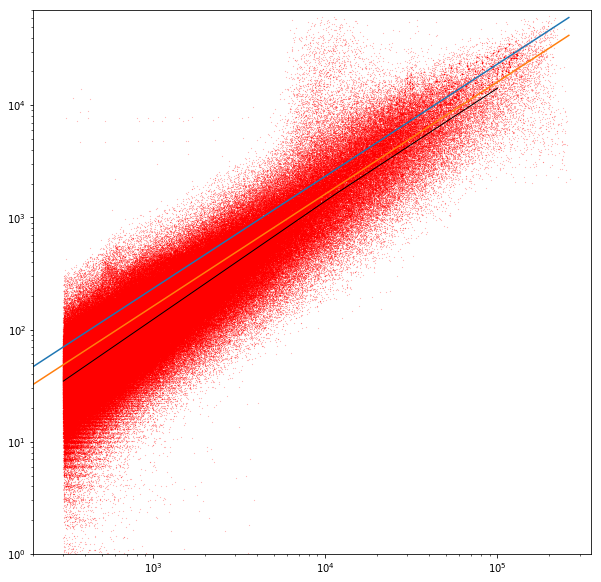

In [39]:
fig = plt.figure(1, figsize = (10,10))
ax = fig.add_subplot(1,1,1)
#ax.scatter(img_106_satur, img_4203g_satur, s=0.01, color = 'blue')
ax.plot([0,260000],[0,260000/4.3])
ax.plot([0,260000],[0,260000/6.2])
#ax.plot([0,260000],[0,260000/5.20], label = 'sqrt(stacked_no)')
#ax.legend(loc = 'lower right')
x_pred = np.linspace(thresh, satur,10)
y_pred = reg.predict(x_pred.reshape(10,1))
plt.plot(x_pred, y_pred, linewidth = 1, color = 'k')
print((x_pred[-1]-x_pred[0])/(y_pred[-1]-y_pred[0]))
print((x_pred[1]-x_pred[0])/(y_pred[1]-y_pred[0]))
ax.scatter(IMG_STA_thresh, IMG_SIN_g_thresh, s=0.01, color = 'r')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(200,350000)
ax.set_ylim(1,70000)

In [28]:
IMG_STA_thresh.shape

(1012719,)

5.400240930678079
5.40024093067808


(1, 300000)

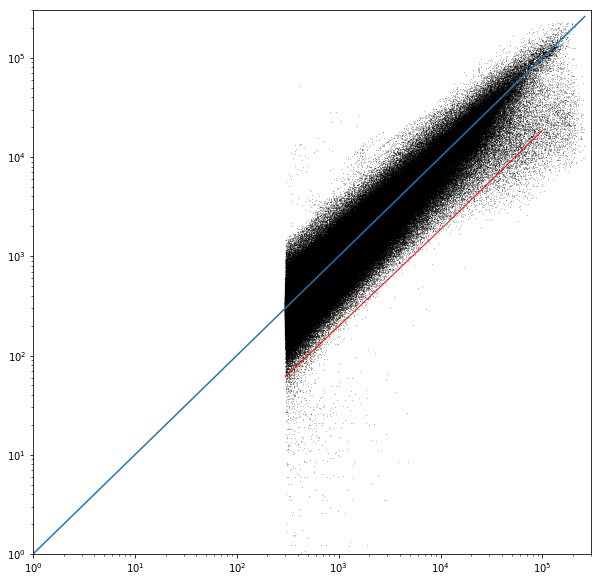

In [26]:
fig = plt.figure(1, figsize = (10,10))
ax = fig.add_subplot(1,1,1)
#ax.scatter(img_106_satur, img_4203g_satur, s=0.01, color = 'blue')
#ax.plot([0,260000],[0,260000/4.69])
#ax.plot([0,260000],[0,260000/5.29], label = 'sqrt(stacked_no)')
ax.plot([0,260000],[0,260000])
x_pred = np.linspace(thresh, satur,10)
y_pred = reg.predict(x_pred.reshape(10,1))
plt.plot(x_pred, y_pred, linewidth = 1, color = 'r')
print((x_pred[-1]-x_pred[0])/(y_pred[-1]-y_pred[0]))
print((x_pred[1]-x_pred[0])/(y_pred[1]-y_pred[0]))

#ax.legend(loc = 'lower right')

ax.scatter(IMG_STA_thresh, IMG_SIN_r_thresh*4.93, s=0.01, color = 'k')
#ax.scatter(IMG_STA_satur[inlier_mask], IMG_SIN_r_satur[inlier_mask], s=0.01, color = 'b')
#ax.scatter(IMG_STA_satur[outlier_mask], IMG_SIN_r_satur[outlier_mask], s=0.01, color = 'g')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1,300000)
ax.set_ylim(1,300000)

(1, 50000)

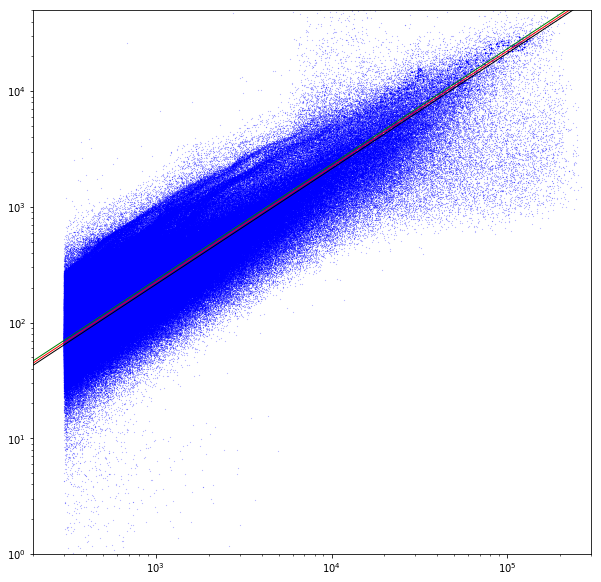

In [22]:
fig = plt.figure(1, figsize = (10,10))
ax = fig.add_subplot(1,1,1)
#ax.scatter(img_106_satur, img_4203g_satur, s=0.01, color = 'blue')
#ax.plot([0,260000],[0,260000/4.69])
ax.plot([0,260000],[0,260000/4.7],color='k',linewidth = 1, label = '4.7')
ax.plot([0,260000],[0,260000/4.5],color='r',linewidth = 1, label = '4.5')
ax.plot([0,260000],[0,260000/4.3],color='g',linewidth = 1, label = '4.3')

#ax.plot([0,260000],[0,260000/5.20], label = 'sqrt(stacked_no)')
#ax.legend(loc = 'lower right')

ax.scatter(IMG_STA_thresh, IMG_SIN_i_thresh, s=0.01, color = 'b')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(200,300000)
ax.set_ylim(1,50000)

In [7]:
print(IMG_SIN_g.min(), IMG_SIN_g.max())
print(IMG_SIN_r.min(), IMG_SIN_r.max())
print(IMG_SIN_i.min(), IMG_SIN_i.max())


-38.74384953979961 62718.84243448071
-34.05806672701078 50567.75986640594
-74.0475506514963 52754.516695235536


In [10]:
print(IMG_STA_g.min(), IMG_STA_g.max())
print(IMG_STA_r.min(), IMG_STA_r.max())
print(IMG_STA_i.min(), IMG_STA_i.max())
#print(IMG_STA.min(), IMG_STA.max())


-33.37226104736328 387067.53125
-90.35285186767578 280864.15625
-94.82207489013672 394166.71875


In [8]:
mini = -1000
maxi = 400000

'''if stacked_no == 34:
    Fg, Fr, Fi = 5.08, 5.84, 5.52
elif stacked_no == 28:
    Fg, Fr, Fi = 4.61, 5.20, 4.54'''

#Fg, Fr, Fi = 5.9, 4.9, 4.5
Fg, Fr, Fi = 4.957, 4.957, 4.957

print(len(IMG_STA_r))
'''
print(IMG_STA_g.min()*(maxi-mini)+mini, IMG_STA_g.max()*(maxi-mini)+mini)
print(IMG_STA_r.min()*(maxi-mini)+mini, IMG_STA_r.max()*(maxi-mini)+mini)
print(IMG_STA_i.min()*(maxi-mini)+mini, IMG_STA_i.max()*(maxi-mini)+mini)
'''

14767


'\nprint(IMG_STA_g.min()*(maxi-mini)+mini, IMG_STA_g.max()*(maxi-mini)+mini)\nprint(IMG_STA_r.min()*(maxi-mini)+mini, IMG_STA_r.max()*(maxi-mini)+mini)\nprint(IMG_STA_i.min()*(maxi-mini)+mini, IMG_STA_i.max()*(maxi-mini)+mini)\n'

In [11]:
print(IMG_SIN_g.min()*Fg, IMG_SIN_g.max()*Fg)
print(IMG_SIN_r.min()*Fr, IMG_SIN_r.max()*Fr)
print(IMG_SIN_i.min()*Fi, IMG_SIN_i.max()*Fi)
#print(IMG_STA.min(), IMG_STA.max())

-192.05326216878666 310897.3019477209
-168.82583676579245 250664.38565777423
-228.1292045456917 259107.9490864336


In [9]:
dellist_2 = []
for i in range(len(IMG_STA)):
    if IMG_STA[i].min() < 0:
        dellist_2.append(i)
    
print(dellist_2)

[173, 627]


In [10]:
ID_STA = np.delete(ID_STA, dellist_2, axis=0)

ID_SIN_g = np.delete(ID_SIN_g, dellist_2, axis=0)
ID_SIN_r = np.delete(ID_SIN_r, dellist_2, axis=0)
ID_SIN_i = np.delete(ID_SIN_i, dellist_2, axis=0)

IMG_STA = np.delete(IMG_STA, dellist_2, axis=0)

IMG_SIN_g = np.delete(IMG_SIN_g, dellist_2, axis=0)
IMG_SIN_r = np.delete(IMG_SIN_r, dellist_2, axis=0)
IMG_SIN_i = np.delete(IMG_SIN_i, dellist_2, axis=0)

In [12]:


IMG_STA_g = (IMG_STA_g - mini)/(maxi-mini)
IMG_STA_r = (IMG_STA_r - mini)/(maxi-mini)
IMG_STA_i = (IMG_STA_i - mini)/(maxi-mini)

IMG_SIN_g = (IMG_SIN_g*Fg - mini)/(maxi-mini)
IMG_SIN_r = (IMG_SIN_r*Fr - mini)/(maxi-mini)
IMG_SIN_i = (IMG_SIN_i*Fi - mini)/(maxi-mini)


In [11]:
ID_STA_r[0][-15:-9]

'1-0543'

In [13]:
print(len(ID_STA_r))
#print(ID_106[17934])
SEP = []
SEP.append(0)
for i in range(len(ID_STA_r)-1):
    if str(ID_STA_r[i])[-15:-9] != str(ID_STA_r[i+1])[-15:-9]:
        SEP.append(i+1)
        #print(i+1, ID_106[i][5:8], ID_106[i+1][5:8])
SEP_5_test = []
for i in range(int(len(SEP)/5)):
    SEP_5_test.append(SEP[5*i])
#SEP_5_test.append(len(ID_106)-1)
dellist = []
for i in range(len(SEP)):
    for j in SEP_5_test:
        if SEP[i] == j:
            dellist.append(i)
SEP_5_tr = np.delete(SEP,dellist)
print('test',SEP_5_test)
print('tr',SEP_5_tr)

TE_STA_g_ID, TE_STA_r_ID, TE_STA_i_ID = [], [], []
TE_SIN_g_ID, TE_SIN_r_ID, TE_SIN_i_ID = [], [], []

TE_STA_g_IMG, TE_STA_r_IMG, TE_STA_i_IMG = [], [], []
TE_SIN_g_IMG, TE_SIN_r_IMG, TE_SIN_i_IMG  = [], [], []

TR_STA_g_ID, TR_STA_r_ID, TR_STA_i_ID = [], [], []
TR_SIN_g_ID, TR_SIN_r_ID, TR_SIN_i_ID = [], [], []

TR_STA_g_IMG, TR_STA_r_IMG, TR_STA_i_IMG = [], [], []
TR_SIN_g_IMG, TR_SIN_r_IMG, TR_SIN_i_IMG = [], [], []

##갯수 제한 train~12000개, test~3000개
SEP_5_test2, SEP_5_tr2 = [], []
if stacked_no == 34:
    SEP_5_test2 = SEP_5_test
    SEP_5_tr2 = SEP_5_tr
elif stacked_no == 28:
    for i in range(len(SEP_5_test)):
        if i%3 != 1:
            SEP_5_test2.append(SEP_5_test[i])
    for i in range(len(SEP_5_tr)):
        if i%3 != 1:
            SEP_5_tr2.append(SEP_5_tr[i])


for j in SEP_5_test2:
    for i in range(len(ID_STA_r)):
        if str(ID_STA_r[i])[-15:-9] == str(ID_STA_r[j])[-15:-9]:
            TE_STA_g_ID.append(ID_STA_g[i])
            TE_STA_r_ID.append(ID_STA_r[i])
            TE_STA_i_ID.append(ID_STA_i[i])
            
            TE_SIN_g_ID.append(ID_SIN_g[i])
            TE_SIN_i_ID.append(ID_SIN_i[i])
            TE_SIN_r_ID.append(ID_SIN_r[i])
            
            TE_STA_g_IMG.append(IMG_STA_g[i])
            TE_STA_r_IMG.append(IMG_STA_r[i])
            TE_STA_i_IMG.append(IMG_STA_i[i])
            
            TE_SIN_g_IMG.append(IMG_SIN_g[i])
            TE_SIN_i_IMG.append(IMG_SIN_i[i])
            TE_SIN_r_IMG.append(IMG_SIN_r[i])
            
for j in SEP_5_tr2:
    for i in range(len(ID_STA_r)):
        if str(ID_STA_r[i])[-15:-9] == str(ID_STA_r[j])[-15:-9]:
            TR_STA_g_ID.append(ID_STA_g[i])
            TR_STA_r_ID.append(ID_STA_r[i])
            TR_STA_i_ID.append(ID_STA_i[i])
            
            TR_SIN_g_ID.append(ID_SIN_g[i])
            TR_SIN_i_ID.append(ID_SIN_i[i])
            TR_SIN_r_ID.append(ID_SIN_r[i])
            
            TR_STA_g_IMG.append(IMG_STA_g[i])
            TR_STA_r_IMG.append(IMG_STA_r[i])
            TR_STA_i_IMG.append(IMG_STA_i[i])
            
            TR_SIN_g_IMG.append(IMG_SIN_g[i])
            TR_SIN_i_IMG.append(IMG_SIN_i[i])
            TR_SIN_r_IMG.append(IMG_SIN_r[i])
            

print(SEP)

14767
test [0, 478, 954, 1434, 1914, 2384, 2848, 3280, 3720, 4160, 4596, 4952, 5072, 5192, 5312, 5430, 5550, 6030, 6502, 6982, 7462, 7942, 8419, 8895, 9363, 9829, 10307, 10779, 11255, 11735, 12205, 12675, 13147, 13623, 14099]
tr [   96   190   286   382   574   670   762   858  1050  1146  1242  1338
  1530  1626  1722  1818  2010  2102  2192  2288  2480  2576  2672  2760
  2936  3024  3112  3192  3368  3456  3544  3632  3808  3896  3984  4072
  4248  4336  4420  4508  4684  4766  4840  4928  4976  5000  5024  5048
  5096  5120  5144  5168  5216  5240  5264  5288  5336  5360  5384  5408
  5454  5478  5502  5526  5646  5742  5838  5934  6126  6222  6318  6406
  6598  6694  6790  6886  7078  7174  7270  7366  7558  7654  7750  7846
  8038  8134  8230  8326  8515  8611  8703  8799  8989  9077  9173  9269
  9455  9551  9643  9735  9925 10021 10117 10211 10403 10499 10587 10683
 10875 10971 11063 11159 11351 11447 11543 11639 11831 11927 12023 12109
 12299 12391 12487 12583 12767 12863 1295

In [13]:
TR_SIN_g_ID[0]

'SIN-004207-g1-0304-0101.fit'

In [18]:
int(520/128)

4

In [14]:
pix = ISIZE
bnd = int(ISIZE/128)
'''
for i in range(len(TE_STA_g_ID)):
    fits_file = fits.PrimaryHDU(data=TE_STA_g_IMG[i].astype('float64').reshape(pix,pix)[bnd:pix-bnd,bnd:pix-bnd])
    fits_file.writeto(REF_PATH + 'stack%d\\test\\stacked\\g\\%s'% (stacked_no, TE_STA_g_ID[i]))
for i in range(len(TE_STA_r_ID)):
    fits_file = fits.PrimaryHDU(data=TE_STA_r_IMG[i].astype('float64').reshape(pix,pix)[bnd:pix-bnd,bnd:pix-bnd])
    fits_file.writeto(REF_PATH + 'stack%d\\test\\stacked\\r\\%s'% (stacked_no, TE_STA_r_ID[i]))
for i in range(len(TE_STA_i_ID)):
    fits_file = fits.PrimaryHDU(data=TE_STA_i_IMG[i].astype('float64').reshape(pix,pix)[bnd:pix-bnd,bnd:pix-bnd])
    fits_file.writeto(REF_PATH + 'stack%d\\test\\stacked\\i\\%s'% (stacked_no, TE_STA_i_ID[i]))'''


for i in range(len(TE_SIN_g_ID)):
    fits_file = fits.PrimaryHDU(data=TE_SIN_g_IMG[i].astype('float64').reshape(pix,pix)[bnd:pix-bnd,bnd:pix-bnd])
    fits_file.writeto(REF_PATH + 'stack%d\\test\\single\\g\\%s'% (stacked_no, TE_SIN_g_ID[i]))
for i in range(len(TE_SIN_r_ID)):
    fits_file = fits.PrimaryHDU(data=TE_SIN_r_IMG[i].astype('float64').reshape(pix,pix)[bnd:pix-bnd,bnd:pix-bnd])
    fits_file.writeto(REF_PATH + 'stack%d\\test\\single\\r\\%s'% (stacked_no, TE_SIN_r_ID[i]))
for i in range(len(TE_SIN_i_ID)):
    fits_file = fits.PrimaryHDU(data=TE_SIN_i_IMG[i].astype('float64').reshape(pix,pix)[bnd:pix-bnd,bnd:pix-bnd])
    fits_file.writeto(REF_PATH + 'stack%d\\test\\single\\i\\%s'% (stacked_no, TE_SIN_i_ID[i]))


In [15]:
pix = ISIZE
'''
for i in range(len(TR_STA_g_ID)):
    fits_file = fits.PrimaryHDU(data=TR_STA_g_IMG[i].astype('float64').reshape(pix,pix))
    fits_file.writeto(REF_PATH + 'stack%d\\train\\stacked\\g\\%s'% (stacked_no, TR_STA_g_ID[i]))
for i in range(len(TR_STA_r_ID)):
    fits_file = fits.PrimaryHDU(data=TR_STA_r_IMG[i].astype('float64').reshape(pix,pix))
    fits_file.writeto(REF_PATH + 'stack%d\\train\\stacked\\r\\%s'% (stacked_no, TR_STA_r_ID[i]))
for i in range(len(TR_STA_i_ID)):
    fits_file = fits.PrimaryHDU(data=TR_STA_i_IMG[i].astype('float64').reshape(pix,pix))
    fits_file.writeto(REF_PATH + 'stack%d\\train\\stacked\\i\\%s'% (stacked_no, TR_STA_i_ID[i]))'''

for i in range(len(TR_SIN_g_ID)):
    fits_file = fits.PrimaryHDU(data=TR_SIN_g_IMG[i].astype('float64').reshape(pix,pix))
    fits_file.writeto(REF_PATH + 'stack%d\\train\\single\\g\\%s'% (stacked_no, TR_SIN_g_ID[i]))
for i in range(len(TR_SIN_r_ID)):
    fits_file = fits.PrimaryHDU(data=TR_SIN_r_IMG[i].astype('float64').reshape(pix,pix))
    fits_file.writeto(REF_PATH + 'stack%d\\train\\single\\r\\%s'% (stacked_no, TR_SIN_r_ID[i]))
for i in range(len(TR_SIN_i_ID)):
    fits_file = fits.PrimaryHDU(data=TR_SIN_i_IMG[i].astype('float64').reshape(pix,pix))
    fits_file.writeto(REF_PATH + 'stack%d\\train\\single\\i\\%s'% (stacked_no, TR_SIN_i_ID[i]))


In [203]:
del fits_file

In [200]:
TE_SIN_g_ID[0]

'SIN-004207-g1-0513-0101.fit'

In [140]:
for i in range(len(IMG_STA)):
    if ID_STA[i][-15:-9] == '1-0573':
        if np.corrcoef(IMG_STA[i].reshape(260*260), IMG_SIN_r[i].reshape(260*260)).min() < 0.5:
            print(i)

676
687
700
701
706
707
708
709
710
711
712
713
714
717
718
719
720
721
722
725
726
728
729
730
733
734
739
740
741
742
747
748
749
750
751
755
756
757
758
762
763
764


0.9658182588139275


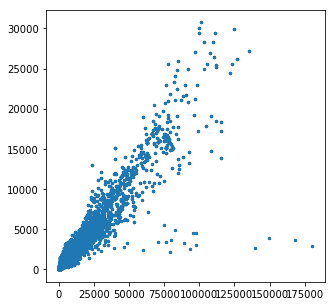

In [172]:
st = 0
num = 100
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(IMG_STA[st:st+num].reshape(num*260*260), IMG_SIN_r[st:st+num].reshape(num*260*260), s=5)
print(np.corrcoef(IMG_STA[st:st+num].reshape(num*260*260), IMG_SIN_r[st:st+num].reshape(num*260*260)).min())
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0.0001,10000)
#plt.ylim(0.0001,2000)


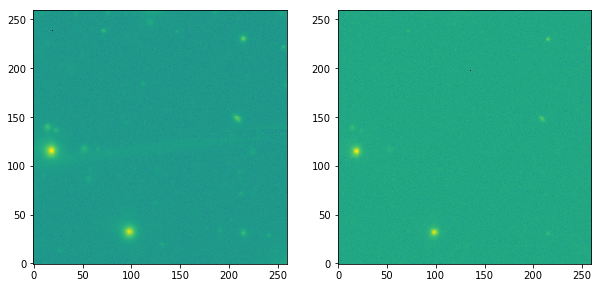

In [165]:
st = 5539
fig = plt.figure(1, figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(IMG_LOG(IMG_STA[st]-IMG_STA[st].min()), origin = 'lower')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(IMG_LOG(IMG_SIN_r[st] - IMG_SIN_r[st].min()), origin = 'lower')


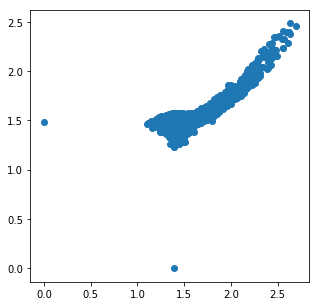

In [167]:
plt.scatter(IMG_LOG(IMG_STA[st]-IMG_STA[st].min()), IMG_LOG(IMG_SIN_r[st] - IMG_SIN_r[st].min()))